<hr style="border-top-width:4px; border-top-color: #2188bf;">
<img align="right" src="images/logos/logo_unipd.png" alt="Drawing" style="width: 300px"/>
<img align="right" src="images/logos/logo_data.jpg" alt="Drawing" style="width: 135px"/>

# LoCP (mod.B) Final Project
# Study of an upper bound of $\mathcal{B}(h \longrightarrow J/\psi \gamma)$ in $pp$ collisions at $\sqrt{s} = 13 \ \text{TeV}$

### Authors
* [**Ardino Rocco**](https://github.com/RoccoA97) (University of Padua)
* [**Paccagnella Andrea**](https://github.com/pacca4) (University of Padua)
* [**Valente Alessandro**](https://github.com/mastrovalentz) (University of Padua)

### Supervisors
* Prof. [**Marco Zanetti**](https://github.com/mzanetti79) (University of Padova, CERN)
* Dr. [**Alberto Zucchetta**](https://github.com/zucchett) (University of Padova, CERN)

### Index <a class="anchor" id="LOCP_B_FP.i"></a>

* 1. [**Introduction**](#LOCP_B_FP.1.)
    * 1.1. [**Project context and goals**](#LOCP_B_FP.1.1.)
    * 1.2. [**Software and needed packages**](#LOCP_B_FP.1.2.)
* 2. [**The datasets**](#LOCP_B_FP.2.)
    * 2.1. [**Background dataset**](#LOCP_B_FP.2.1.)
    * 2.2. [**Signal dataset**](#LOCP_B_FP.2.2.)
* 3. [**Slim, Skim, Cut and Selection operations for background reduction**](#LOCP_B_FP.3.)
    * 3.1. [**Slimming and Skimming through postprocessor**](#LOCP_B_FP.3.1.)
    * 3.2. [**Trigger selection**](#LOCP_B_FP.3.2.)
    * 3.3. [**Precision cuts**](#LOCP_B_FP.3.3.)
* 4. [**Fit of background and signal distributions**](#LOCP_B_FP.4.)
    * 4.1. [**Fit of background distributions**](#LOCP_B_FP.4.1.)
    * 4.2. [**Fit of signal distributions**](#LOCP_B_FP.4.2.)
* 5. [**Toy Monte Carlo analysis**](#LOCP_B_FP.5.)
    * 5.1. [**Definition of the test statistic**](#LOCP_B_FP.5.1.)
    * 5.2. [**Definition of the algorithm**](#LOCP_B_FP.5.2.)
    * 5.3. [**Validation of the test algorithm for $\mu=0$**](#LOCP_B_FP.5.3.)
    * 5.4. [**Results as a function of $\mu$**](#LOCP_B_FP.5.4.)
* 6. [**Conclusions**](#LOCP_B_FP.6.)

<hr style="border-top-width:4px; border-top-color: #2188bf;">




<br>
<br>
<br>
<br>
<br>

<hr style="border-top-width:4px; border-top-color: #2188bf;">

## 1. - Introduction <a class="anchor" id="LOCP_B_FP.1."></a>
* [Index](#LOCP_B_FP.i)

<br>

### 1.1. - Project context and goals <a class="anchor" id="LOCP_B_FP.1.1."></a>
* [Index](#LOCP_B_FP.i)

#### **Physics context**

In 2012, a new boson with a mass of $125 \ \text{GeV}$ was observed in data from the ATLAS and CMS experiments at the CERN LHC. All measurements of the properties of this boson are consistent with those of the Higgs boson ($H$) of the standard model (SM). However, the Yukawa couplings of the Higgs boson to the first- and second-generation quarks are currently only weakly constrained. Rare exclusive decays of the Higgs boson to mesons in association with a photon can be used to explore such couplings. For example, the decay:

$$
H \longrightarrow J/\psi \gamma
$$

can probe the Higgs boson coupling to the charm quark. Through CMS detector, a study can be done by considering the subsequent decay of the $J/\psi$ to $\mu^+\mu^-$, which has a SM predicted branching ratio of:

$$
\mathcal{B}(H \rightarrow J/\psi\gamma \rightarrow \mu^+\mu^-\gamma)
=
\mathcal{B}(H \rightarrow J/\psi\gamma) \cdot \mathcal{B}(J/\psi \rightarrow \mu^+\mu^-)
=
3.0 \cdot 10^{-6} \cdot 5.9 \cdot 10^{-2}
\approx
1.8 \cdot 10^{-7}
$$

This information, combined with the Higgs cross section $\sigma_H$ and with the total integrated luminosity $\mathcal{L}$ of LCH, gives an expected number of events of about $1.22$ over 3 years of runs. So, this is quite difficult to observe, but an exclusion upper limit for the branching ratio can be studied through filtering and Monte Carlo techniques.

#### **Goals**

In this project, we consider the **NanoAOD Charmonium** datasets of CMS from 2016, 2017 and 2018 runs (for the background) and a Monte Carlo simulated dataset of $H \rightarrow J/\psi \rightarrow \mu^+\mu^-\gamma$ (for the signal). Our aims are:
* **finding an optimal cut** applied to both the datasets in order to filter the background data but at the same time keeping a good fraction of signal events;
* **modeling** the filtered background and signal distributions;
* **applying a Monte Carlo statistical analysis** to the background plus signal distribution amplified by a factor $\mu$, namely the signal strength parameter;
* **finding a significance** of signal detection depending on $\mu$, from which we extract the upper limit on the branching ratio.

<br>

### 1.2. - Software and needed packages <a class="anchor" id="LOCP_B_FP.1.2."></a>
* [Index](#LOCP_B_FP.i)

The whole analysis has been performed on the **ROOT** analysis framework, implementing several macros in **c++ language** and some **bash scripts** to automate the workflow. The source code can be found [**here**](https://github.com/pacca4/Project_LocpB_plots). For this report, the **pyROOT** extension is exploited.

Here, we import all the needed python and ROOT packages for the report.

#### **Python packages**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy as sp

In [2]:
from scipy.stats import chi2, chisquare

<hr style="border-top-width:4px; border-top-color: #2188bf;">

<br>
<br>
<br>

<hr style="border-top-width:4px; border-top-color: #2188bf;">

## 2. - The datasets <a class="anchor" id="LOCP_B_FP.2."></a>
* [Index](#LOCP_B_FP.i)

For our analysis, we employ two datasets, one for background data and one for signal. The latter is simulated through Monte Carlo generation software like MadGraph5, taking into account the hadronization and the detector response through other sotwares like Pythia and Delphi.

<br>

### 2.1. - Background dataset <a class="anchor" id="LOCP_B_FP.2.1."></a>
* [Index](#LOCP_B_FP.i)

The background dataset is the collection of the **NanoAOD** files belonging to the **Charmonium list**. It contains the filtered data from CMS experiment collected from the runs from 2016 to 2018. Note that the NanoAOD format comes from the last part of pre-selection events and its weigth is of the order of **~1 kB/event**. This is very small compared to the weigth of about ~1 MB/event of raw data coming from the trigger.

<br>

### 2.2. - Signal dataset <a class="anchor" id="LOCP_B_FP.2.2."></a>
* [Index](#LOCP_B_FP.i)

The signal dataset is a Monte Carlo simulation of the decay $H \longrightarrow J/\psi \gamma$, coming as well as the background files in the NanoAOD format.

<hr style="border-top-width:4px; border-top-color: #2188bf;">

<br>
<br>
<br>

<hr style="border-top-width:4px; border-top-color: #2188bf;">

## 3. - Slim, Skim, Cut and Selection operations for background reduction <a class="anchor" id="LOCP_B_FP.3."></a>
* [Index](#LOCP_B_FP.i)

Since the number of background events is too huge for our purpuse, the first part of our work is reducing this dataset through several operations done in order:
* **Slimming**: we are interested only in certain physical features and triggers inside the background files, so we keep only the branches useful for the following analysis and for reconstructing some other interesting features. All the rest is not kept.
* **Skimming**: not all the events are interesting for our analysis, in particular the ones which do not satisfy a certain condition on the luminosity during their collection. In the new slimmed and skimmed files, these events will not be present.
* **Selection**: as before, there are some conditions that signal events should meet. Some of them are condensed inside the High Level Triggers (HLTs), which are substantially a bool that is `true` if a characteristic condition is met, otherwise it flags `false`.
* **Cutting**: a candidate signal is characterized by certain kinematic conditions. Therefore, some upper and/or lower bounds on some kinematic features have to be set. The events which do not meet these conditions will not be considered.

In the following subsections, we explain in a deeper way this procedure and we present its results.

<br>

### 3.1. - Slimming and Skimming through postprocessor  <a class="anchor" id="LOCP_B_FP.3.1."></a>
* [Index](#LOCP_B_FP.i)



In the first part of background data reduction, we perform the following operation:
* event selection based on actual luminosity during the acquisition;
* event selection based on the presence of at least 2 muons and a photon;
* invariant mass computation of the dimuon and the dimuon plus a photon;
* event selection based on raw cuts on kinematic variables.

Therefore, the first thing the events must satisfy is to belong to one of the optimal luminosity blocks. This information is stored in several JSON formatted text files. Then, the remaining events are required to satisfy the following properties:
- $\color{green}{m_{\mu\mu\gamma}\in[70, 150] \ \text{GeV}/c^2}$, where $m_{\mu\mu\gamma}$ is the $\mu\mu\gamma$ invariant mass;
- $\color{green}{m_{\mu\mu}\in [2.8, 3.3] \ \text{GeV}/c^2}$, where $m_{\mu\mu}$ is the $\mu\mu$ invariant mass;
- $\color{green}{p_{T,\mu_1}>10 \ \text{GeV}/c}$, where $p_{T,\mu_1}$ is the leading muon transverse momementum;
- $\color{green}{p_{T,\gamma}>20 \ \text{GeV}/c}$, where $p_{T,\gamma}$ is the photon transverse momementum.

By this way, we obtain a smaller dataset, deleting lots of events which do not belong to our case study.




Although in the slimming operation we remove several branches from root files, it is convenient for the following analysis to add new branches to store useful observables for signal over background discrimination when we monitorate the difference from Monte Carlo simulated dataset.

The new main physical observables computed are:
* **`JPsi_mass`**: the reconstructed mass of the candidate $J/\psi$; 
<!-- It is computed through: $$\sqrt{2P_{T1}P_{T2}(cosh(\eta_1-\eta_2)-cos(\phi_1-\phi_2))}$$ where $\eta$ is a  pseudo-rapidity; -->
* **`JPsi_pt`**: the transverse momentum $p_T$ of the candidate $J/\psi$;
* **`JPsi_eta`**: the pseudorapidity $\eta$ of the candidate $J/\psi$;
* **`JPsi_phi`**: the azimuthal angle $\phi$ of the candidate $J/\psi$;

* **`Reco_mass`**: the reconstructed mass of the candidate $H$;
* **`Reco_pt`**: the transverse momentum $p_T$ of the candidate $H$;
* **`Reco_eta`**: the pseudorapidity $\eta$ of the candidate $H$;
* **`Reco_phi`**: the azimuthal angle $\phi$ of the candidate $H$.

Some other classes of features are added for further analysis, where we perform precision cuts:
* **`DeltaR`**: the $\Delta R$ between two particles, defined as:

    $$
    \Delta R = \sqrt{(\Delta\phi)^2+(\Delta\eta)^2}
    $$

* **`AngleCM`**: the cosine angle between two particles in the center of mass frame, computed as:

    $$
    \cos\theta = \frac{\vec{v_1}^*\cdot\vec{v_2^*}} {|\vec{v_1^*}|\cdot|\vec{v_2^*}|}
    $$

* **`DeltaPhiCM`**: the $\phi$ angle between two particles in the center of mass frame;

* **`DeltaRCM`**: the $\Delta R$ between two particles in the center of mass frame.
<!-- $\triangle R = \sqrt{(\triangle\phi^*)^2+(\triangle\eta^*)^2}$ -->

The angular variables are computed by boosting the particles momenta to the center of mass frame of the reconstructed particles. In the reference frame the $\Delta R$, $\Delta \phi$ and $\Delta \eta$ are computed alongside with the angle between the tracks.

All these operations are performed by implementing a python class called **postprocessor**, where all the manipulations on the root files are inserted. In particular, this class is instantiated inside a python CMS script, which takes also the JSON files for the optimal luminosity blocks.

The results for some of the most meaningful observables are reported below.
<table>
    <tr>
        <td valign="top"><img src="images/Photon_etaSkimmed.png"></td>
        <td valign="top"><img src="images/Photon_pt[0]Skimmed.png"></td> 
    </tr>
    <td valign="top"><img src="images/Muon_pt0Skimmed.png"></td>
    <td valign="top"><img src="images/Muon_pt1Skimmed.png"></td>       
</table>

From this plots, we are able to decide which can be reasonable further cuts to apply. These are:
* $\color{green}{q_{\mu_1} \neq q_{\mu_2}}$ (leading and subleading muons poss diffrent electric charges);
* $\color{green}{p_{T,\mu_1}>15 \ \text{GeV}/c}$;
* $\color{green}{p_{T,\mu_2}>2 \ \text{GeV}/c}$;
* $\color{green}{p_{T,\gamma}>25 \ \text{GeV}/c}$;
* $\color{green}{|\eta_{\gamma}|<2.9}$.


<br>

### 3.2. - Trigger selection  <a class="anchor" id="LOCP_B_FP.3.2."></a>
* [Index](#LOCP_B_FP.i)

The next step in background reduction is a finer selection through some selected trigger conditions.

The choice of a particular trigger has to be discussed since a trigger can be present only in a limited portion of the ROOT files analyzed. After checking which are the valid triggers present in every file, an optimal choice should rely on the efficiency of the trigger for signal events selection and on thr physical problem we are studying. This means that a good trigger condition for our study is one that cuts a sufficiently large portion of background events but a little portion of signal events. Hence, we define the efficiency of a trigger as the signal events kept in percentage after its application.

We check the efficiency for every valid trigger in the following cell.

In [5]:
! head -n 60 ../Triggers/TrigAcce.txt

HLT_L1SingleMuOpen acc % 99.7098
HLT_Mu8 acc % 96.8805
HLT_L1SingleMu18 acc % 92.8989
HLT_Mu3_PFJet40 acc % 92.6365
HLT_TkMu17 acc % 92.6293
HLT_Mu17 acc % 91.8064
HLT_TkMu20 acc % 90.5703
HLT_L2Mu10 acc % 89.5062
HLT_Mu12_Photon25_CaloIdL_L1OR acc % 88.9799
HLT_Mu12_Photon25_CaloIdL acc % 88.9799
HLT_Mu7p5_Track2_Jpsi acc % 88.8761
HLT_Mu7p5_Track3p5_Jpsi acc % 88.0069
HLT_Mu20 acc % 86.0105
HLT_Mu12_Photon25_CaloIdL_L1ISO acc % 85.7331
HLT_Mu17_Photon22_CaloIdL_L1ISO acc % 83.9251
HLT_Mu17_Photon30_CaloIdL_L1ISO acc % 83.7352
HLT_Mu8_TrkIsoVVL acc % 81.4521
HLT_TkMu24_eta2p1 acc % 81.3461
HLT_Mu17_Photon35_CaloIdL_L1ISO acc % 81.0097
HLT_Mu16_TkMu0_dEta18_Onia acc % 80.0708
HLT_Mu17_TrkIsoVVL acc % 79.7814
HLT_TkMu27 acc % 79.7451
HLT_Mu23NoFiltersNoVtx_Photon23_CaloIdL acc % 78.4904
HLT_Mu7p5_Track7_Jpsi acc % 76.5587
HLT_Mu24_eta2p1 acc % 76.2735
HLT_IsoTkMu18 acc % 73.9363
HLT_Mu27 acc % 73.7301
HLT_IsoTkMu20 acc % 73.2813
HLT_IsoTkMu22 acc % 71.3573
HLT_Mu16_eta2p1_MET30 acc % 71

From this analysis we choose the follwing triggers:
- **`HLT_IsoMu27`** : it requires an isolate muon with transverse momentum greater than $27 \ \text{GeV}/c$;
- **`HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ`** : it requires two isolate muons with transverse momenta greater that $17$ and $8 \ \text{GeV}/c$  respectively.

Both signal and background datasets are then filtered using those triggers separately. So, we compare the distributions for few relevant features for the following operations, for the choice of both the triggers. In particular, we put in comparison:
* **`JPsi_mass`**;
* **`Photon_pt[0]`**;
* **`Photon_pt[0]`**/**`Reco_mass`**.

In the left we can see the plot coming from **`HLT_IsoMu27`** trigger and in the right the plot coming from **`HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ`**

<table>
    <tr>
        <td valign="top"><img src="images/JPsi_massIsomu.png"></td>
        <td valign="top"><img src="images/JPsi_massIsotrk.png"></td> 
    </tr>
        <td valign="top"><img src="images/Photon_pt[0]Isomu.png"></td>
        <td valign="top"><img src="images/Photon_pt[0]Isotrk.png"></td>
    <tr>
        <td valign="top"><img src="images/Photon_pt0Reco_massIsomu.png"></td>
        <td valign="top"><img src="images/Photon_pt0Reco_massIsotrk.png"></td>
</table>

<br>

### 3.3. - Precision cuts  <a class="anchor" id="LOCP_B_FP.3.3."></a>
* [Index](#LOCP_B_FP.i)

From this plot we apply these cuts:
- $p_{T,\gamma}/m_{\mu\mu\gamma}>0.38$
- $M_{\mu\mu}\in [3, 3.2]$

We don't apply other cuts to the transverse momentum of Photon. 
Afterwards we compare the distributions of the angular features, from both triggers, showed in the following plots, however we decide not to apply any other cuts.

<table>
    <tr>
        <td valign="top"><img src="images/angular_final/DeltaR_Mu0Mu1isomu.png"></td>
        <td valign="top"><img src="images/angular_final/DeltaR_Mu0Mu1isotrk.png"></td> 
    </tr>
        <td valign="top"><img src="images/angular_final/DeltaR_Mu0Phtisomu.png"></td>
        <td valign="top"><img src="images/angular_final/DeltaR_Mu0Phtisotrk.png"></td>
    <tr>
        <td valign="top"><img src="images/angular_final/DeltaR_Mu1Phtisomu.png"></td>
        <td valign="top"><img src="images/angular_final/DeltaR_Mu1Phtisotrk.png"></td>
</table>

At the end of the cutting procces we are redy to fit the Signal (Monte Carlo) and Background (Data) recostructed mass distribution.

<hr style="border-top-width:4px; border-top-color: #2188bf;">

<br>
<br>
<br>

<hr style="border-top-width:4px; border-top-color: #2188bf;">

## 4. - Fit of background and signal distributions <a class="anchor" id="LOCP_B_FP.4."></a>
* [Index](#LOCP_B_FP.i)

Once the quality cuts and the trigger selection have been applied, we get four different datasets: the signal and background ones for the two selected triggers. In order to perform a statistical analysis, it is fundamental to model the invariant mass spectrum distribution for all the datasets. In this section, we try to accomplish this task by employing ROOfit, but at the same time we try to avoid too complex models since they would require a higher computational effort for the final Monte Carlo analysis.

<br>

### 4.1. - Background distributions <a class="anchor" id="LOCP_B_FP.4.1."></a>
* [Index](#FP.i)

The distribution of the reconstructed mass obtained from the above described selections are shown in the following

<table>
    <tr>
        <td valign="top"><img src="images/BkgMassIsoMu.png"></td>
        <td valign="top"><img src="images/BkgMassIsoTrk.png"></td>
    </tr>
</table>

Given the trend of invariant mass in these plots, we decide to fit the distributions using either an exponential PDF or polynomial function. For `IsoMu` trigger the best results have been obtained using a $2^{\text{nd}}$ degree polynomial, while for `IsoTrk` trigger the best results where given by an exponential PDF. The fit was performed using the Maximum Likelihood Estimation method over the binned dataset. Moreover, it is important to notice that in order to avoid bias for future predictions the fit was performed while being "blind" in the signal region.

The results of this procedure are showed in the following plots.

<table>
    <tr>
        <td valign="top"><img src="images/fit/BkgFitIsoMu.png"></td>
        <td valign="top"><img src="images/fit/BkgFitIsoTrk.png"></td>
    </tr>
</table>

<br>

## 4.2. - Signal distributions <a class="anchor" id="LOCP_B_FP.4.2."></a>
* [Index](#FP.i)

As we have done for the background, we try to find the distribution of the simulated signal events after the selections. Since the trigger acceptance is similar and the other selections are equal for the both datasets, we expect that these distributions are quite similar.

<table>
    <tr>
        <td valign="top"><img src="images/SigMassIsoMu.png"></td>
        <td valign="top"><img src="images/SigMassIsoTrk.png"></td>
    </tr>
</table>


As expected, the distributions are very similar. Therefore, we are potentially able to fit them locally with the same distribution. Differently from the background distributions, it is not possible to perform a fit for signal spectra using a simple PDF, mainly due to the tails which are asymmetric.

The model used for the fit was then defined by summing many PDFs and applying some constrains. A good choice to take into account the asymmetry in the tails is to fit with a Cristall Ball function, which reads:

$$
f(x ; \alpha, n, \bar{x}, \sigma)
=
N \cdot
\begin{cases}
    \exp \left(-\frac{(x-\bar{x})^{2}}{2 \sigma^{2}}\right), & \text { for } \frac{x-\bar{x}}{\sigma}>-\alpha \\
    A \cdot\left(B-\frac{x-\bar{x}}{\sigma}\right)^{-n}, & \text { for } \frac{x-\bar{x}}{\sigma} \leqslant-\alpha
\end{cases}$$

For the final PDF model, the crystal ball function is added to other three gaussian distributions with a proper weight. Moreover, since we expect the mass resonance to have a precise value in the invariant mass spectrum, we then impose the center of the gaussians to be at the same position of the crystal ball function peak.

This new model allow us to reproduce in an optimal way the form of the distribution. The final signal PDF reads:

$$
\mathcal{S}(m) = f_c \mathcal{CB}(m) + (1-f_c)\mathcal{G_S}
$$

where $f_c$ is the weight of the crystal ball and $(1-f_c)$ the weight of the sum of the three gaussians $\mathcal{G_3}$ function, which reads:

$$
\mathcal{G_3}(m)= f_1\mathcal{G_1}(m)+(1-f_1)\left[ f_2\mathcal{G_2}(m) + (1-f_2)\mathcal{G_3}(m)\right]
$$

where $f_{1,2,3}$ are proper weights.

We show the results of the signal fit in the plots below.

<table>
    <tr>
        <td valign="top"><img src="images/fit/SignalFitIsoMu.png"></td>
        <td valign="top"><img src="images/fit/SignalFitIsoTrk.png"></td>
    </tr>
</table>

<hr style="border-top-width:4px; border-top-color: #2188bf;">

<br>
<br>
<br>

<hr style="border-top-width:4px; border-top-color: #2188bf;">

## 5. - Toy Monte Carlo analysis <a class="anchor" id="LOCP_B_FP.5."></a>
* [Index](#LOCP_B_FP.i)

Now that we have cutted a large portion of background events and we have modeled the background and the signal distributions, we move to the last part of our analysis. We perform a toy Monte Carlo statistical analysis using as statistical test a log likelihood ratio, as it is done for the standard analysis at LHC, but with some differences.

<br>

### 5.1. - Definition of the test statistic <a class="anchor" id="LOCP_B_FP.5.1."></a>
* [Index](#LOCP_B_FP.i)

The first step is to define a statistical variable, whose distribution will be sampled for several $\mu$ values, each distribution defining a certain hypotesis $H_{\mu}$. This is the negative loglikelihood ratio, which reads:

$$
    q(\mu)
    =
    - 2 \log \frac{\mathcal{L}(\mu;\hat{\sigma}(\mu))}{\mathcal{L}(\hat{\mu};\hat{\hat{\sigma}}(\hat{\mu}))}
$$

The quantity on the numerator is the likelihood computed on the data with the best-fit parameters $\hat{\sigma}$ infered at fixed $\mu$. The quantity on the denominator is maximum possible likelihood computed on the data. This is our starting point for the statistical analysis.

For our analysis, we will focus on the invariant mass spectrum of the candidate $h$, so we will speak about data, we will imply these are the measurements of $m_{\mu\mu\gamma}$. Another fact to take into account is that we have binned data. Therefore, the number of counts $n_i$ in the $i^{\text{th}}$ bin follows a Poisson distribution, whose characteristic parameter will be denoted with $\sigma_i$. The former reads:

$$
    \sigma_i = B_i + \mu S_i
$$

where $B_i$ and $S_i$ are respectively the number of background and signal events in the $i^{\text{th}}$ bin.

<br>

### 5.2. - Definition of the algorithm <a class="anchor" id="LOCP_B_FP.5.2."></a>
* [Index](#LOCP_B_FP.i)

Taking into account what previously defined, we can express in a more clear way the test statistic expression for our toy Monte Carlo sampler algorithm:

$$
    q(\mu)
    =
    - 2 \log \frac{\mathcal{L}(\mu;\hat{\sigma}(\mu))}{\mathcal{L}(\hat{\mu};\hat{\hat{\sigma}}(\hat{\mu}))}
    =
    - 2 \log \frac{\displaystyle \prod_{n_i \in \text{bin}_i} \frac{{\hat{\sigma}_i}^{n_i}}{n_i!} e^{-\hat{\sigma}_i}}{\displaystyle \prod_{n_i \in \text{bin}_i} \frac{{n_i}^{n_i}}{n_i!} e^{-n_i}}
    =
    - 2 \log \prod_{n_i \in \text{bin}_i} \left( \frac{\hat{\sigma}_i}{n_i} \right)^{n_i} e^{-\hat{\sigma}_i + n_i}
    =
    - 2 \sum_{n_i \in \text{bin}_i} \left[ n_i \log\left( \frac{\hat{\sigma}_i}{n_i} \right) -\hat{\sigma}_i + n_i \right]
$$

In order to sample $q(\mu)$ for a certain value of $\mu$, we apply a toy Monte Carlo study. A single toy produces a single value of $q(\mu)$ with the following steps:
* the signal distribution is added to the background distribution after a proper rescaling based on the luminosity, the cross section and the number of signal events in the MC simulated signal;
* the rescaled signal distribution summed to the background distribution is amplified by a factor $\mu$;
* a number of events compatible with the residual background and the expected signal events is generated through Monte Carlo simulation;
* the generated toy dataset is put into a histogram with a fixed number of bins $n^{\text{ToyMC}}_{\text{bins}}$;
* this simulated and binned spectrum is fitted again, but only with the background distribution (here comes the difference with the standard LHC procedure);
* the background fit is employed to compute the $t(\mu)$ defined before, with the $\hat{\sigma}_i$ for every bin calculated through the fit.

This algorithm is repeated for a large number of times to have a smooth sampled distribution for $H_{\mu}$.

<br>

### 5.3. - Validation of the algorithm for $\mu=0$ <a class="anchor" id="LOCP_B_FP.5.3."></a>
* [Index](#LOCP_B_FP.i)

Before presenting the results for a scan in a $\mu$ range, it is necessary to check if the test statistic is solid and valid. So, we focus in this subsection of the case of $\mu=0$, where the background distribution coincides with the signal plus background distribution.

From Wilks's theorem, we know that this test statistic for $H_0$ follows asymptotically a $\chi^2$ distribution with a number of degrees of freedom equal to the number of bins $n^{\text{ToyMC}}_{\text{bins}}$ minus the number of background fit parameters, so respectively a 37 and 38 dofs $\chi^2$ distributions for `IsoMu` and `IsoTrk`. We check in the following cells if this expectation is met by comparing the toy Monte Carlo sampled distribution of $q(\mu=0)$ with a $\chi^2(\nu)$ distribution.

In [3]:
nsamp      = 100000
nbins      =     40
mu         =      0
nev_IsoMu  =  21000
nev_IsoTrk =   6000

fname_IsoMu  = 'ToyMC_BatchMu_IsoMu__nsamples_' +str(nsamp)+'__nbins_'+str(nbins)+'__nev_'+str(nev_IsoMu) +'__mu_'+str(mu)+'.0.txt'
fname_IsoTrk = 'ToyMC_BatchMu_IsoTrk__nsamples_'+str(nsamp)+'__nbins_'+str(nbins)+'__nev_'+str(nev_IsoTrk)+'__mu_'+str(mu)+'.0.txt'

dir_IsoMu  = "../MC_results/ToyMC_BatchMu_IsoMu__nsamples_" +str(nsamp)+"__nbins_"+str(nbins)+"__nev_"+str(nev_IsoMu) +"/"
dir_IsoTrk = "../MC_results/ToyMC_BatchMu_IsoTrk__nsamples_"+str(nsamp)+"__nbins_"+str(nbins)+"__nev_"+str(nev_IsoTrk)+"/"

data_mu_0_IsoMu  = np.loadtxt(dir_IsoMu  + fname_IsoMu )
data_mu_0_IsoTrk = np.loadtxt(dir_IsoTrk + fname_IsoTrk)

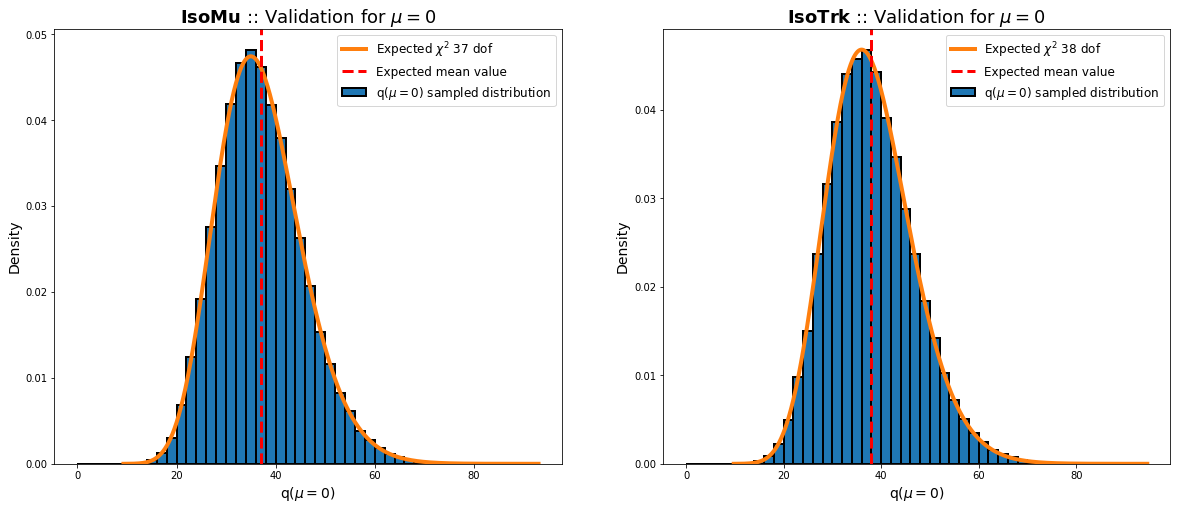

In [14]:
nb   =  40
xmin =   0
xmax =  80
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

dof_IsoMu   = 37
dof_IsoTrk  = 38
med0_IsoMu  = np.median(data_mu_0_IsoMu )
med0_IsoTrk = np.median(data_mu_0_IsoTrk)

x_IsoMu  = np.linspace(chi2.ppf(0.000001,dof_IsoMu ), chi2.ppf(0.999999,dof_IsoMu ), 10000)
x_IsoTrk = np.linspace(chi2.ppf(0.000001,dof_IsoTrk), chi2.ppf(0.999999,dof_IsoTrk), 10000)
    
axes[0].hist(data_mu_0_IsoMu,  bins=nb, edgecolor='black', linewidth=2, range=(xmin, xmax), density=True, label="q($\mu=0$) sampled distribution")
axes[1].hist(data_mu_0_IsoTrk, bins=nb, edgecolor='black', linewidth=2, range=(xmin, xmax), density=True, label="q($\mu=0$) sampled distribution")
axes[0].plot(x_IsoMu,  chi2.pdf(x_IsoMu,  dof_IsoMu ), '-', lw=4, alpha=1, label="Expected $\chi^2$ "+str(dof_IsoMu )+" dof")
axes[1].plot(x_IsoTrk, chi2.pdf(x_IsoTrk, dof_IsoTrk), '-', lw=4, alpha=1, label="Expected $\chi^2$ "+str(dof_IsoTrk)+" dof")
axes[0].axvline(dof_IsoMu,  c='r', ls='--', lw=3, label="Expected mean value")
axes[1].axvline(dof_IsoTrk, c='r', ls='--', lw=3, label="Expected mean value")
axes[0].set_xlabel("q($\mu=0$)", fontsize=14)
axes[1].set_xlabel("q($\mu=0$)", fontsize=14)
axes[0].set_ylabel("Density", fontsize=14)
axes[1].set_ylabel("Density", fontsize=14)
axes[0].set_title("$\\bf{IsoMu}$ :: Validation for $\mu=0$",  fontsize=18)
axes[1].set_title("$\\bf{IsoTrk}$ :: Validation for $\mu=0$", fontsize=18)
axes[0].legend(fontsize=12)
axes[1].legend(fontsize=12)

plt.show()

<br>

### 5.4. - Results as a function of $\mu$ <a class="anchor" id="LOCP_B_FP.5.4."></a>
* [Index](#LOCP_B_FP.i)

Now, we move to the analysis of $q(\mu)$ distribution for $\mu \neq 0$ and we introduce the algorithm employed for extracting the statistical results from the toy Monte Carlo sampling.

We want to translate the discrepancy between the $H_0$ and $H_{\mu}$ distributions in statistical terms. After having checked that the $H_0$ follows the expected distribution, we can evaluate a $p$-value on it for a given $H_{\mu}$, but we have to define the bounds of the integral through which the $p$-value is computed. More precisely, the definition of the $p$-value reads:

$$
p(\mu)
=
\int_{-\infty}^{\xi} \chi^2(q; \nu) \ \text{d}q
$$

The bound $\xi$ in the previous equation should be extracted from the $H_{\mu}$ distribution by calculating a meaningful statistical quantity. A reasonable possibility is the median $q_{\text{med}}(\mu)$, since it allows an easier comparison with an eventual ideal significance value. Therefore, the previous equation reads:

$$
p_{\text{med}}(\mu)
=
\int_{-\infty}^{q_{\text{med}}(\mu)} \chi^2(q; \nu) \ \text{d}q
$$

where $p_{\text{med}}(\mu)$ is the median $p$-value computed through the median $q(\mu)$ of the distribution $H_{\mu}$. From this quantity, we can retrieve a median significance from a one-tail comparison with a normal distribution:

$$
\sigma_{\text{med}}
=
\sqrt{2} \cdot \text{erf}^{-1}(1 - p_{\text{med}})
$$

In the following cells, we present the results for both **`IsoMu`** and **`IsoTrk`** datasets, obtaining an upper limit for $\mu$ at a 95% CL.

#### **Results for `HLT_IsoMu27` dataset** <a class="anchor" id="LOCP_B_FP.5.4.1."></a>

Firstly, we perform a coarse scan over the various results for several values of $\mu$.

In [6]:
%run -i 'LoadIsoMu.py'
%run -i 'finalPlots.py'

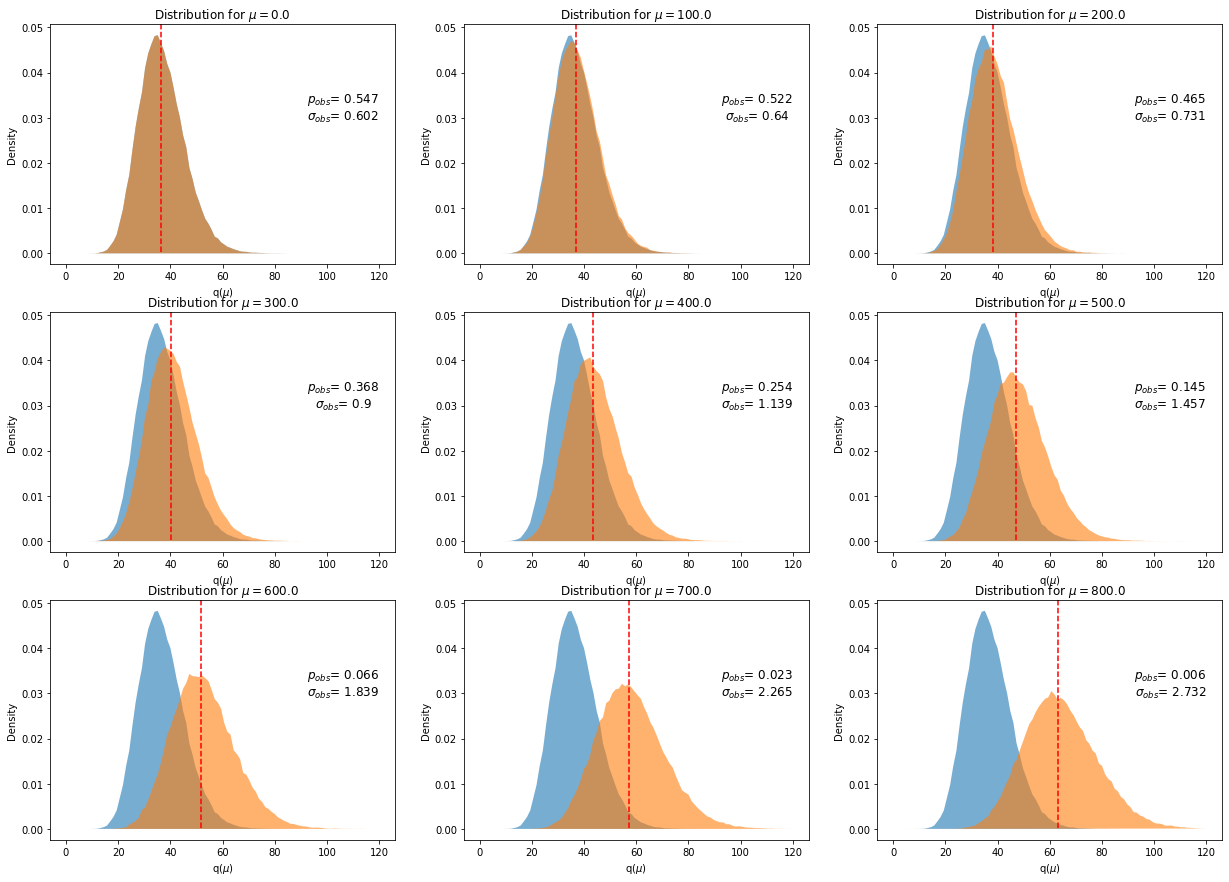

In [15]:
nr = 3
nc = 3
fig, axs = plt.subplots(nr, nc, figsize=(7*nc, 5*nr))
for i in range(0,nr):
    for j in range(0,nc):
        sub_plot_hists(axs[i,j], 100, 10*(j+nc*i))

From the previous plots, we find an interval for $\mu$ inside which the median significance reaches a value of 2. So, we perform a finer scan inside this region.

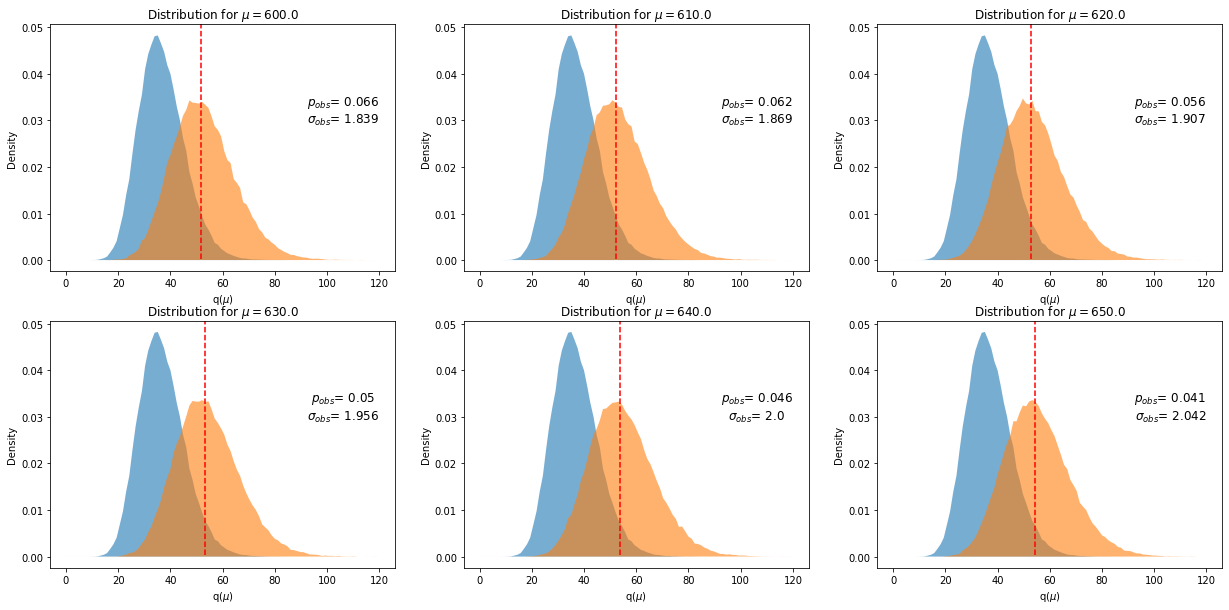

In [9]:
nr = 2
nc = 3
fig, axs = plt.subplots(nr, nc, figsize=(7*nc, 5*nr))
for i in range(0,nr):
    for j in range(0,nc):
        sub_plot_hists(axs[i,j], 100, 60+(j+nc*i))

By this way, we find the upper limit for $\mu$ at a 95% CL for `HLT_IsoMu27` dataset. In the following cell, we plot the distribution $H_{\mu}$ depending on the value of $\mu$ and the median significance dependece on $\mu$ for the same dataset.

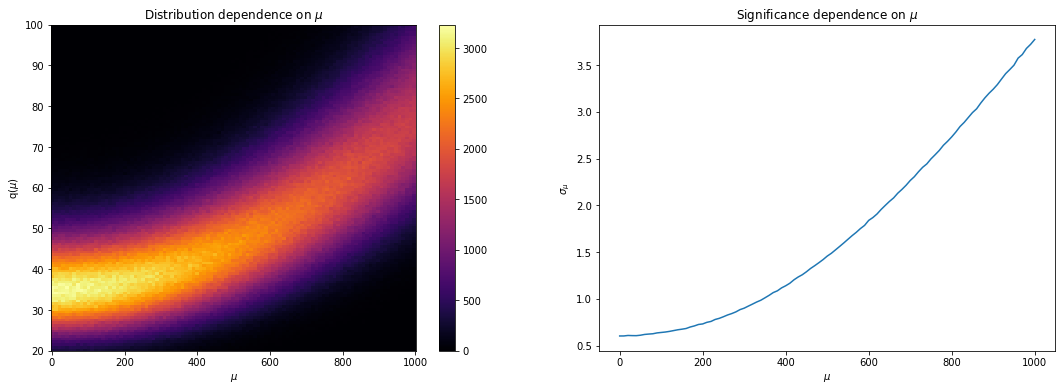

In [9]:
sigs=[]
for i in np.linspace(0,100,101, dtype=np.int):
    sigs.append(significance(200, i)[1])

h_mu=[]
for i in range (0, nsamp):
    h_mu.append(mus)
h_mu= np.array(h_mu).T

plot_all_distr_isoMu(sigs, h_mu)

#### **Results for `HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ` dataset** <a class="anchor" id="LOCP_B_FP.5.4.2."></a>

As before, we first perform a coarse scan over the various results for several values of $\mu$.

In [10]:
%run -i 'LoadIsoTrk.py'
%run -i 'finalPlots.py'

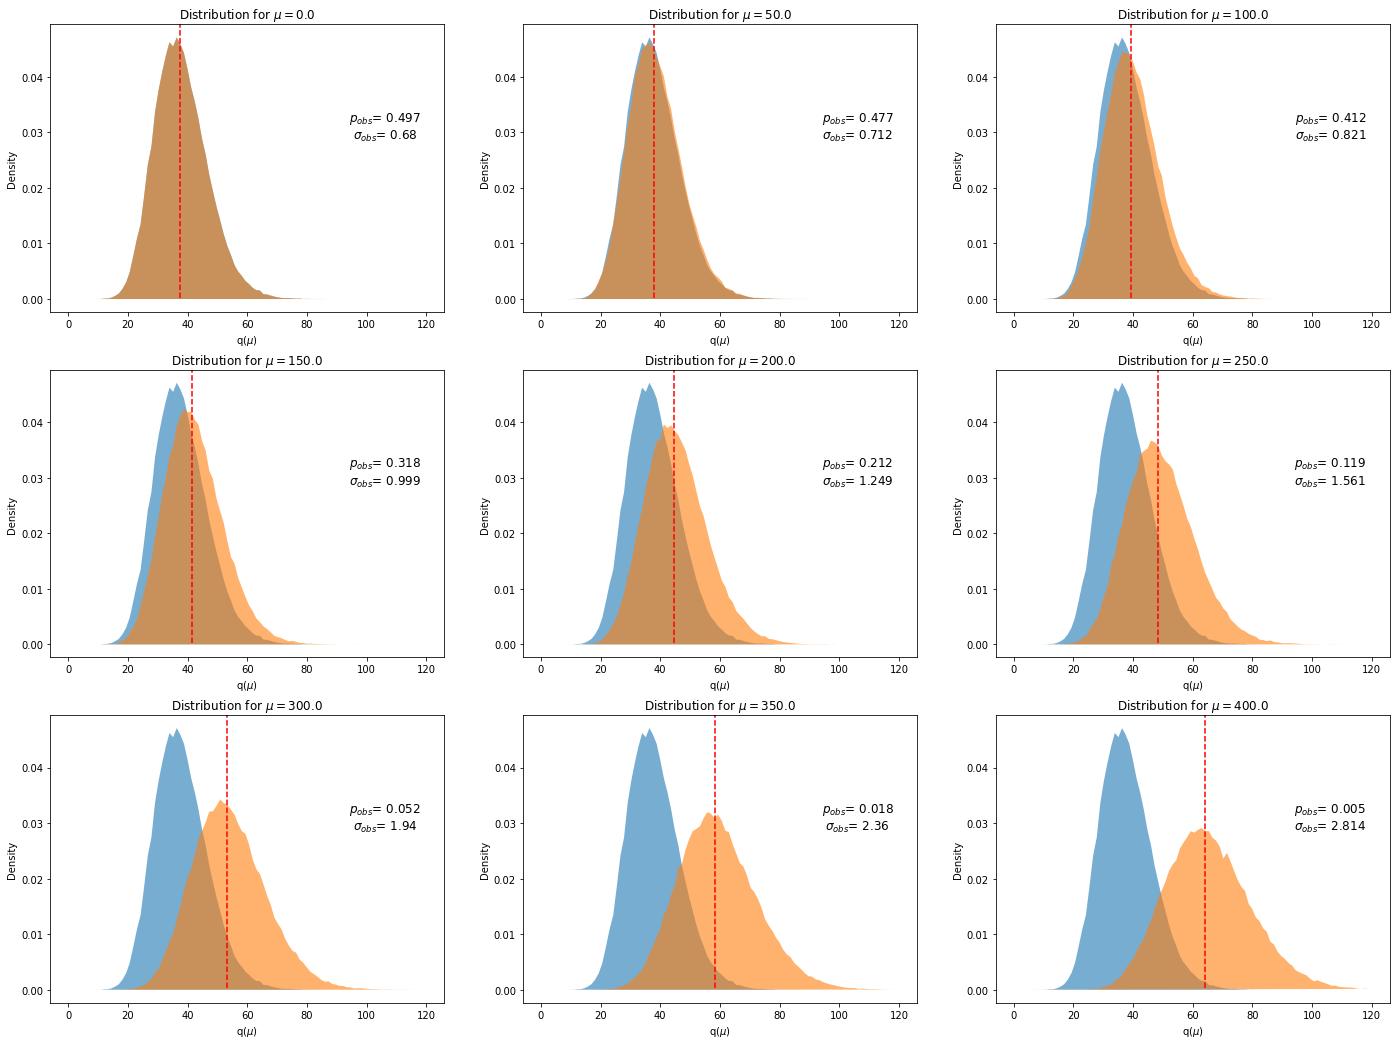

In [21]:
nr = 3
nc = 3
fig, axs = plt.subplots(nr, nc, figsize=(8*nc, 6*nr))
for i in range(0,nr):
    for j in range(0,nc):
        sub_plot_hists(axs[i,j], 100, 10*(j+nc*i))

From the previous plots, we find an interval for $\mu$ inside which the median significance reaches a value of 2. So, we perform a finer scan inside this region.

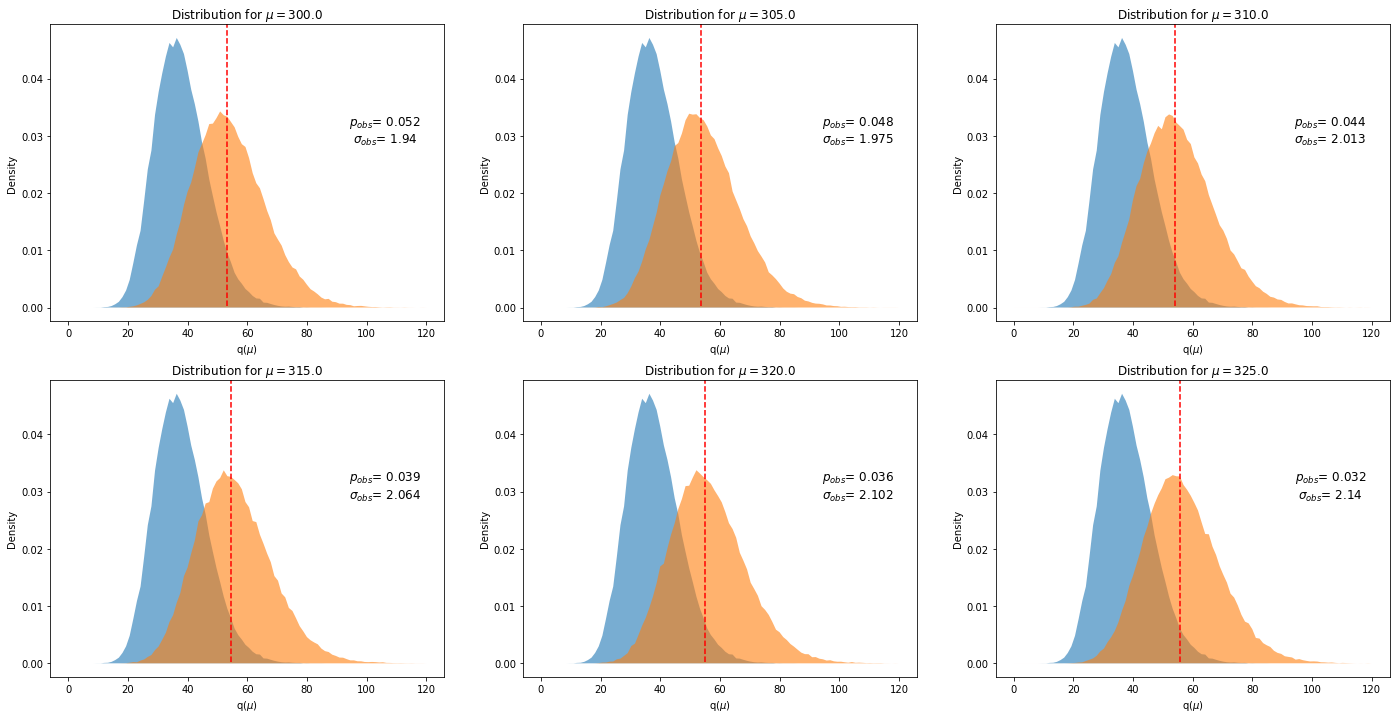

In [22]:
nr = 2
nc = 3
fig, axs = plt.subplots(nr, nc, figsize=(8*nc, 6*nr))
for i in range(0,nr):
    for j in range(0,nc):
        sub_plot_hists(axs[i,j], 100, 60+(j+nc*i))

By this way, we find the upper limit for $\mu$ at a 95% CL for `HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ` dataset. In the following cell, we plot the distribution $H_{\mu}$ depending on the value of $\mu$ and the median significance dependece on $\mu$ for the same dataset.

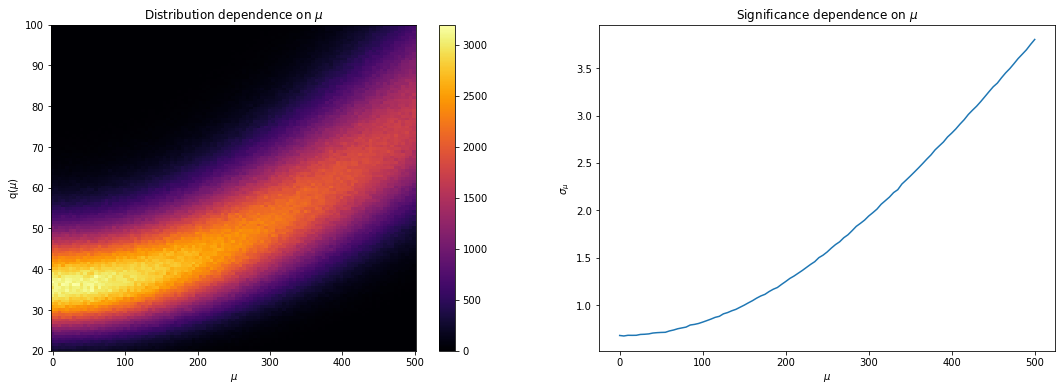

In [13]:
sigs=[]
for i in np.linspace(0,100,101, dtype=np.int):
    sigs.append(significance(200, i)[1])

h_mu=[]
for i in range (0, nsamp):
    h_mu.append(mus)
h_mu= np.array(h_mu).T

plot_all_distr_isoTrk(sigs, h_mu)

<hr style="border-top-width:4px; border-top-color: #2188bf;">

<br>
<br>
<br>

<hr style="border-top-width:4px; border-top-color: #2188bf;">

## 6. - Conclusions <a class="anchor" id="LOCP_B_FP.6."></a>
* [Index](#LOCP_B_FP.i)